In [1]:
import torch
from torcheval.metrics.functional import binary_accuracy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py

## Dataset Loading, Visualize & Proprocessing

In [2]:
# Loading the data (cat/non-cat)
train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
test_dataset = h5py.File('data/test_catvnoncat.h5', "r")

train_X_orig = torch.tensor( train_dataset['train_set_x'][:].reshape(209,-1), dtype=torch.float32)  # (m, d)=(209, 12288);  from (209,64,64,3)
train_Y = torch.tensor( train_dataset['train_set_y'][:].reshape(209,-1), dtype=torch.float32)           # (m, 1)=(209, 1)

test_X_orig = torch.tensor( test_dataset['test_set_x'][:].reshape(50,-1), dtype=torch.float32)  # (50, 12288)
test_Y = torch.tensor( test_dataset['test_set_y'][:].reshape(50,-1), dtype=torch.float32)          # (50, 1)

train_X = train_X_orig/255.0
test_X = test_X_orig/255.0

In [3]:
print (f"Number of training examples: m_train = {train_X_orig.shape[0]}")
print (f"Number of testing examples: m_test = {test_X_orig.shape[0]}")
print ("Each image is of size: (64, 64, 3) \n")
print (f"train_X shape: {train_X.shape}")
print (f"train_Y shape: {train_Y.shape}")
print (f"test_X shape: {test_X.shape}")
print (f"test_Y shape: {test_Y.shape}")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Each image is of size: (64, 64, 3) 

train_X shape: torch.Size([209, 12288])
train_Y shape: torch.Size([209, 1])
test_X shape: torch.Size([50, 12288])
test_Y shape: torch.Size([50, 1])


y = 1, it's a 'cat' picture.


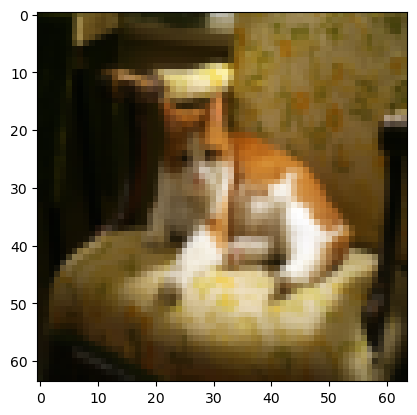

In [4]:
classes = test_dataset["list_classes"][:] # the list of classes
# Visualize sample picture
index = 7
plt.imshow(train_X_orig[index].numpy().astype(np.uint8).reshape(64,64,3))
print (f"y = {int(train_Y[index])}, it's a '{classes[int(train_Y[index])].decode('utf-8')}' picture.")

# Theory Hidden Layer Neural Network

## Now
$ \boldsymbol{X} = \begin{bmatrix} \quad \boldsymbol x^1 \quad 
\\ \quad \boldsymbol{x}^2 \quad \\ \quad \vdots \quad \\ \quad \boldsymbol x^m \quad \end{bmatrix} $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 & f_2 & f_3 & \dots \quad f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,d)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,d)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,1)}$ 

$$ 
\boldsymbol{W^{[l]}} = 
\begin{bmatrix} \bold {w_1} \\ \bold {w_2}  \\ \vdots \\ \bold {w_{n_l}} \end{bmatrix} =
\begin{bmatrix} ---\boldsymbol{\omega_1}^T--- \\ ---\boldsymbol{\omega_2}^T--- \\ \vdots \\ ---\boldsymbol{\omega_{n_l}}^T--- \end{bmatrix}
,\qquad \boldsymbol{b^{[l]}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3  \\ \vdots  \\ b_{n_l} \end{bmatrix}
$$
$$ \boldsymbol{\omega_{n}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_{n_{l-1}} \end{bmatrix}$$
So
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1}, 1)}$
$,\qquad \qquad \bold w \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1, n_{l-1})}$
<br>
$ \boldsymbol{W^{l}} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l, n_{l-1})}$
$ ,\qquad \enspace \boldsymbol{b} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l,)}$

build-in linear($A^{[l-1]}$)
<br>
$ \boldsymbol{Z^{[l]}/linear} = \boldsymbol{A^{[l-1]} W^{[l]^T}+b}
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(m,n_l)=(m,n_{l-1})\times(n_{l-1},n_l)} $
<br>
$ \boldsymbol Z^{[l]} = \begin{bmatrix} z^1 \\ z^2 & \boldsymbol{z^{[l]}_{2}} & \boldsymbol{z^{[l]}_{3}} & \dots & \boldsymbol{z^{[l]}_{n_l}} \\ \vdots \\ z^m \end{bmatrix} $

**Data**
<br>
$
\boldsymbol {X} = \boldsymbol {A^{[0]}} \qquad \qquad \
\color{purple}{shape: \qquad}\color{blue}{(m,n_0)} \color{default}
\\
\boldsymbol {Y}, \ \boldsymbol {\hat{Y}=A^{[L]}} \qquad \quad \ \
\color{purple}{shape: \qquad}\color{blue}{(m,n_L)} \color{default}
\\
\boldsymbol {W^{[l]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_l,n_{l-1})} \color{default}
\\
\boldsymbol {b^{[l]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_{l},)} \color{default}
$

$ \boldsymbol {Z^{[l]}} = \boldsymbol{A^{[l-1]}W^{[l]T}} + \boldsymbol{b^{[l]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(m,n_l)=(m,n_{l-1})\times(n_{l-1},n_l)} \\$

# Model using sequential, optimizer API

In [5]:
def nn_layers_model(train_X, train_Y, layers_dims, num_epochs=2000, learning_rate=0.0075, activation_L_1="relu", activation_L="sigmoid", print_cost=False):
    """
    L layer neural network with different activation function on output layer option.
    
    Parameters
    ----------
    train_X : Tensor [shape: (#samples, #features)]; dtype=tf.float32
    train_Y : Tensor [shape: (#samples, 1)]; dtype=tf.float32
    layers_dims : list of int; list of number of nodes in each layer

    Returns
    -------
    forward : trained model
    costs : list of cost every 100 iteration
    """
    costs = []                                        # To keep track of the cost
    L = len(layers_dims) # number of layers in the network

    ## Initialize layers
    activations = torch.nn.ModuleDict({ 'sigmoid':torch.nn.Sigmoid(), 'tanh':torch.nn.Tanh(),
                'relu':torch.nn.ReLU(), 'lrelu':torch.nn.LeakyReLU() })
    layers_list = []
    for in_f, out_f in zip(layers_dims, layers_dims[1:-1]):
        layers_list.append(torch.nn.Linear(in_f, out_f))
        layers_list.append(activations[activation_L_1])
    layers_list.append(torch.nn.Linear(layers_dims[-2], layers_dims[-1]))
    layers_list.append(activations[activation_L])
        
    forward = torch.nn.Sequential(*layers_list)
    
    ## Initialize parameters
    np.random.seed(3)
    with torch.no_grad():
        for l in range(1, L):
            init_W = torch.tensor( np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1]), dtype=torch.float32 )
            init_b = torch.zeros((layers_dims[l], ))
            forward[2*(l-1)].weight.copy_(init_W)
            forward[2*(l-1)].bias.copy_(init_b)
            
    optimizer = torch.optim.SGD(forward.parameters(), lr = learning_rate)

    ## epochs loop
    for i in range(num_epochs): 
        ## forward pass
        train_Y_pred = forward(train_X)       # (209,n_L)=(m,n_L)
        cost = torch.nn.functional.binary_cross_entropy(train_Y_pred, train_Y, reduction="mean")

        ## backward pass
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        ## Record the cost every 100 iterations
        if i % 100 == 0 or i == num_epochs-1:
            costs.append(cost.item())
            if print_cost:
                print(f"Cost in epochs {i+1}, {cost.item()}")
    
    return forward, costs

## Run Model

Cost in epochs 1, 0.7611919641494751
Cost in epochs 101, 0.619948148727417
Cost in epochs 201, 0.5392001271247864
Cost in epochs 301, 0.4473138451576233
Cost in epochs 401, 0.4172644019126892
Cost in epochs 501, 0.3013911247253418
Cost in epochs 601, 0.23082919418811798
Cost in epochs 701, 0.10751891881227493
Cost in epochs 801, 0.06943003088235855
Cost in epochs 901, 0.0484931617975235
Cost in epochs 1001, 0.03627549856901169
Cost in epochs 1101, 0.028758425265550613
Cost in epochs 1201, 0.023825202137231827
Cost in epochs 1301, 0.02038579247891903
Cost in epochs 1401, 0.017631974071264267
Cost in epochs 1501, 0.014800095930695534
Cost in epochs 1601, 0.012470670975744724
Cost in epochs 1701, 0.01058660726994276
Cost in epochs 1801, 0.008688120171427727
Cost in epochs 1901, 0.007172602694481611
Cost in epochs 2000, 0.005957248155027628
train accuracy: 100.0 %
test accuracy: 80.0000011920929 %


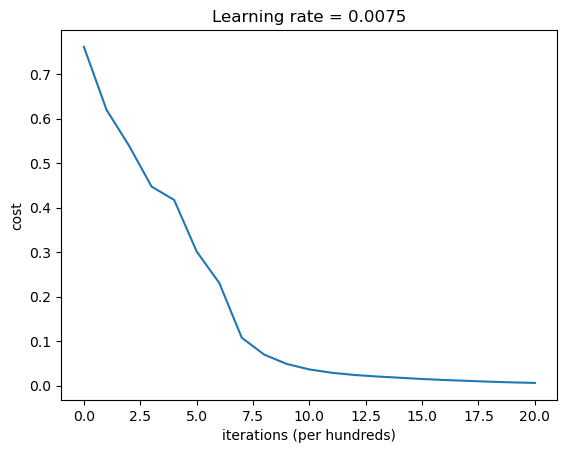

In [6]:
activation_L_1="relu"; activation_L="sigmoid"; learning_rate = 0.0075; layers_dims=[12288, 20, 15, 15, 1]

forward, costs = nn_layers_model(train_X, train_Y, layers_dims=layers_dims, num_epochs=2000, learning_rate=learning_rate, activation_L_1=activation_L_1, activation_L=activation_L, print_cost=True)

## Predict train/test set examples
train_Y_pred = forward(train_X)                          # shape(m,1) --> X(m,d)*W(d,1)+b(m,); Tensor float32
train_Y_pred_out = (train_Y_pred > 0.5).type(torch.float32)   # shape(m,1); Tensor float32
test_Y_pred = forward(test_X)               
test_Y_pred_out = (test_Y_pred > 0.5).type(torch.float32)

## Print train/test Errors
acc = binary_accuracy(input=train_Y_pred.view(-1,), target=train_Y.view(-1,), threshold=0.5)
print(f"train accuracy: { acc.item() *100 } %")
acc = binary_accuracy(input=test_Y_pred.view(-1,), target=test_Y.view(-1,), threshold=0.5)
print(f"test accuracy: { acc.item() *100 } %")

# Plot learning curve (with costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title(f"Learning rate = {learning_rate}")
plt.show()

**Comment**: Training accuracy is close to 100%. This is a good sanity check: Test accuracy is 80%. The model is clearly overfitting the training data. It can be reduced by regularization technique and using more layers neural network to capture nonlinear complexity better.

**Interpretation**:
The cost decreasing shows that the parameters are being learned. However, could train the model even more on the training set. Increasing the number of iterations/epochs result in the training accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## Plot results

y = 1,  but y_pred = 1 so predicted that it is a 'cat' picture.


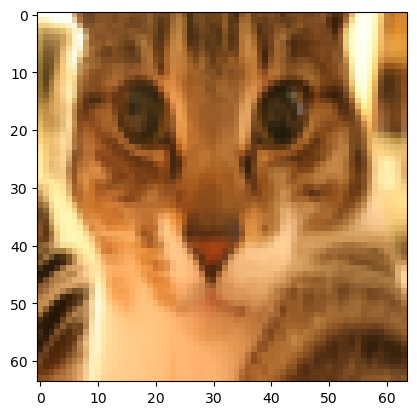

In [7]:
# Example of a picture that is rightly classified.
index = 3
plt.imshow(test_X_orig[index].numpy().astype(np.uint8).reshape(64,64,3))
print(f"y = {int(test_Y[index])},  but y_pred = {int(test_Y_pred_out[index])} so predicted that it is a '{classes[int(test_Y_pred_out[index])].decode('utf-8')}' picture.")

y = 0, but y_pred = 1 so predicted that it is a 'cat' picture.


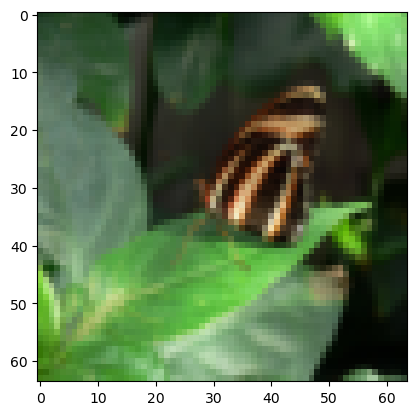

In [8]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_X_orig[index].numpy().astype(np.uint8).reshape(64,64,3))
print(f"y = {int(test_Y[index])}, but y_pred = {int(test_Y_pred_out[index])} so predicted that it is a '{classes[int(test_Y_pred_out[index])].decode('utf-8')}' picture.")

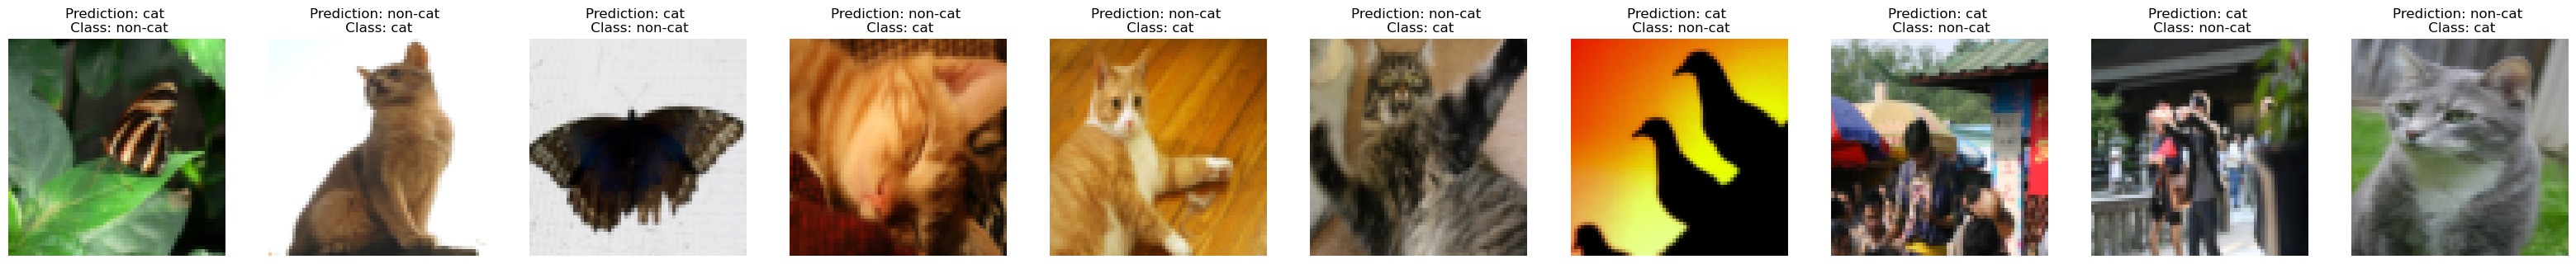

In [9]:
# Plots false predicted images
a = test_Y_pred_out + test_Y
mislabeled_indices = np.asarray(np.where(a == 1))
plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
num_images = len(mislabeled_indices[0])
for i in range(num_images):
    index = mislabeled_indices[0][i]
    
    plt.subplot(2, num_images, i + 1)
    plt.imshow(test_X[index].reshape(64,64,3), interpolation='nearest')
    plt.axis('off')
    plt.title("Prediction: " + classes[int(test_Y_pred_out[index])].decode("utf-8") + " \n Class: " + classes[int(test_Y[index])].decode("utf-8"))
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

# Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work, must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly change the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of `learning rates`. Run the cell below. 

Training a model with learning rate: 0.005

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.05

-------------------------------------------------------

Training a model with learning rate: 0.1

-------------------------------------------------------



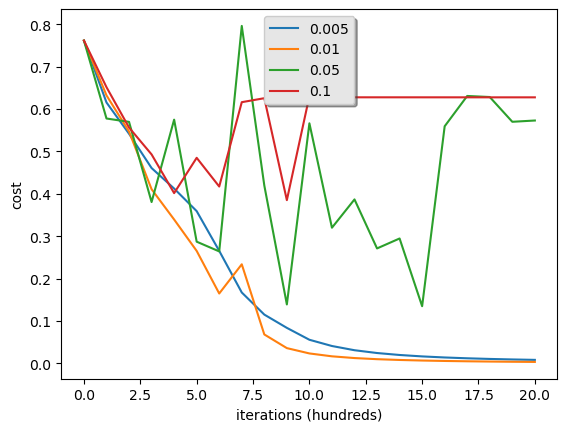

In [10]:
learning_rates = [0.005, 0.01, 0.05, 0.1]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = nn_layers_model(train_X, train_Y, layers_dims, num_epochs=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)][1]), label=str(lr))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Training a model with learning rate: 0.0075

-------------------------------------------------------

Training a model with learning rate: 0.0085

-------------------------------------------------------

Training a model with learning rate: 0.009

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------



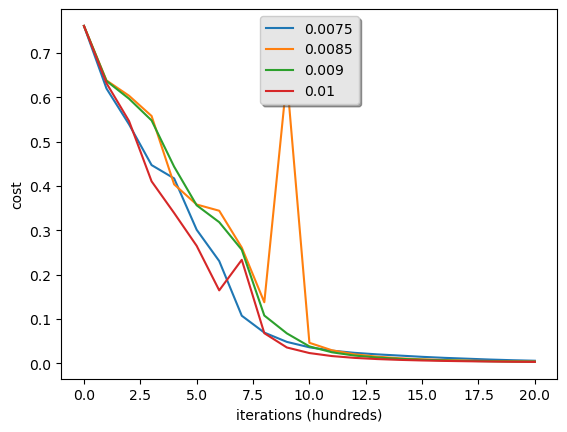

In [11]:
learning_rates = [0.0075, 0.0085, 0.009, 0.01]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = nn_layers_model(train_X, train_Y, layers_dims, num_epochs=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)][1]), label=str(lr))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.0075 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If model overfits, use other techniques to reduce overfitting.


# Test with your own image ##

Use your own image and see the output of your model. To do that:<br>
1. Add image to this Jupyter Notebook's directory, in the "img" folder.<br>
2. Change your image's name in the following code<br>
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!<br>

y_pred = 1, neuron algorithm predicts a 'cat' picture.


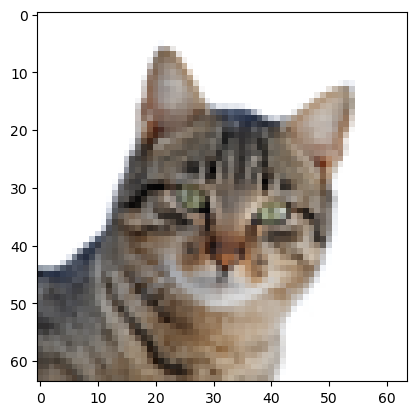

In [12]:
# change this to the name of your image file
my_image = "img/my_image_1.jpg"   

num_px = 64
# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3))   # np.ndarray shape(1, 12288); float64
image = torch.tensor(image, dtype=torch.float32)   # shape(1, 12288); float32

image_pred = forward(image)     # shape(m,n_y)
image_pred_out = (image_pred > 0.5).type(torch.float32)     

print(f"y_pred = {int(image_pred_out)}, neuron algorithm predicts a '{classes[int(image_pred_out)].decode('utf-8')}' picture.")

y_pred = 1, neuron algorithm predicts a 'cat' picture.


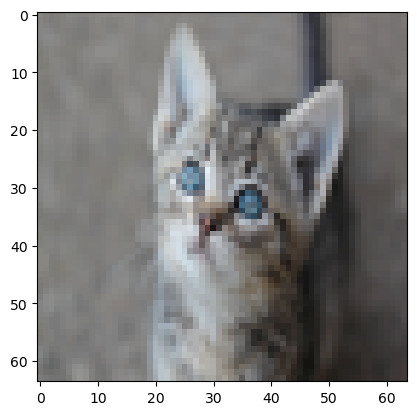

In [13]:
# change this to the name of your image file
my_image = "img/my_image_2.jpg"   

# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3))    # np.ndarray shape(1, 12288)
image = torch.tensor(image, dtype=torch.float32)   # shape(1, 12288); float32

image_pred = forward(image)     # shape(m,n_y)
image_pred_out = (image_pred > 0.5).type(torch.float32)    

print(f"y_pred = {int(image_pred_out)}, neuron algorithm predicts a '{classes[int(image_pred_out)].decode('utf-8')}' picture.")